# Intervalos de confiança para amostras pequenas

Quando o tamanho da amostra é pequeno ($n < 30$), não há bons métodos gerais para encontrar intervalos de confiança, nem para $\mu$, nem para $p$. No entanto, quando sabemos que a população é aproximadamente normal, a **distribuição t de Student** pode ser usada para calcular os intervalos de confiança para uma média populacional nos casos em que $n<30$. Vamos descrever essa distribuição e mostrar como usá-la para construir intervalos de confiança.

## Distribuição $t$ de Student

A distribuição $t$ de Student foi proposta em um [artigo](https://www.york.ac.uk/depts/maths/histstat/student.pdf) publicado em 1908 por William Gosset. Seu objetivo era permitir realizar estudos estatísticos sobre **amostras pequenas**. Por questões de confidencialidade relacionadas à empresa para a qual trabalhava, William usou o pseudônimo *Student* nessa publicação.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/William_Sealy_Gosset.jpg/800px-William_Sealy_Gosset.jpg" width="150px"/>
</center>

Considere que $X_{1}, X_{2}, \cdots, X_{n}$ é uma amostra de tamanho $n$ retirada de uma população que segue (aproximadamente) uma distribuição normal com média $\mu$. Nessa amostra, calculam-se a média amostral (*sample mean*) e a variância amostral (*sample variance*):

$$
\begin{aligned}
	\overline{x}	=	{\frac {X_{1}+ X_2 + \cdots +X_{n}}{n}} \quad
	s^{2}		=	{\frac {1}{n-1}}\sum _{i=1}^{n}(X_{i}-{\overline{x}})^{2}.
\end{aligned}
$$

A estatística $T$ é definida por
$$
	T = \frac{\overline{x} - \mu}{s/\sqrt{n}}
$$

É possível provar que $T$ segue a distribuição de probabilidades denominada $t$ de Student, com $(n - 1)$ **graus de liberdade**. A função de densidade de probabilidade de uma variável que segue a distribuição $t$ é dada pela expressão matemática a seguir. Essa expressão usa a [função Gama](https://en.wikipedia.org/wiki/Gamma_function), denotada por $\Gamma$ na expressão abaixo.

$$
f(t) = \textstyle {\frac {\Gamma \left({\frac {\nu +1}{2}}\right)}{{\sqrt {\nu \pi }}\,\Gamma \left({\frac {\nu }{2}}\right)}}\left(1+{\frac {t^{2}}{\nu }}\right)^{-{\frac {\nu +1}{2}}}\!
$$

A quantidade de graus de liberdade, denotada por $\nu$ na expressão acima, é um parâmetro dessa distribuição. Um esboço da prova para derivar a expressão acima pode ser encontrado nesse [vídeo](https://youtu.be/jFOyzEJctUU). Uma derivação completa pode ser encontrada nesse outro [vídeo](https://youtu.be/XMfFxwZXHaI).

A distribuição $t$ com $n-1$ graus de liberdade é a distribuição amostral (*sampling distribution*) da estatística $T$.

Repare a semelhança da estatística $T$ com a estatística $Z$:
$$
	Z = \frac{\overline{x} - \mu}{\sigma/\sqrt{n}}
$$

É importante notar que, apesar da grande semelhança sintática entre as definições dessas duas estatísticas, $Z$ segue a distribuição normal, enquanto que $T$ não segue. De fato, a distribuição $t$ é usada em estudos estatísticos envolvendo amostras pequenas justamente para levar em consideração o correspondente maior grau de incerteza resultante de usar $s$ em vez de $\sigma$.

Sobre o conceito de *graus de liberdade*, usado na definição da distribuição $t$, esse [link](https://bluebox.creighton.edu/demo/modules/en-boundless-old/www.boundless.com/statistics/textbooks/boundless-statistics-textbook/measures-of-variation-6/describing-variability-26/degrees-of-freedom-136-4427/index.html) fornece uma descrição intuitiva.

### Principais características

Algumas características da distribuição $t$ são descritas a seguir.

- A forma da função de densidade da distribuição $t$ é controlada pelo parâmetro $\nu$, que é conhecido como a quantidade de graus de liberdade (*degrees of freedom*). (O símbolo $\nu$ é uma [letra grega](https://pt.wikipedia.org/wiki/Ν));

- A forma da função de densidade da distribuição $t$ é semelhante à da distribuição normal padrão. Em particular, a distribuição $t$ é simétrica em relação ao 0;

- Para uma amostra de tamanho $n$, o valor do parâmetro $\nu$ é definido com $\nu = n - 1$;

- Para valores pequenos de $n$, a curva da distribuição $t$ é mais espalhada do que a da normal padrão, mas o espalhamento diminui à medida que o número de graus de liberdade aumenta.

- Quando $n > 30$, a distribuição $t$ se aproxima muito da distribuição normal padrão;

- No limite, quando $n \rightarrow \infty$, a distribuição $t$ é igual à distribuição normal padrão;

A figura a seguir ([fonte](https://en.wikipedia.org/wiki/Student%27s_t-distribution)) apresenta exemplos de diversas distribuições t para diferentes valores do parâmetro $\nu = n-1$.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/1024px-Student_t_pdf.svg.png" width="500px"/>
</center>

A célula de código abaixo ilustra algumas funções do scipy relacionadas à distribuição $t$.

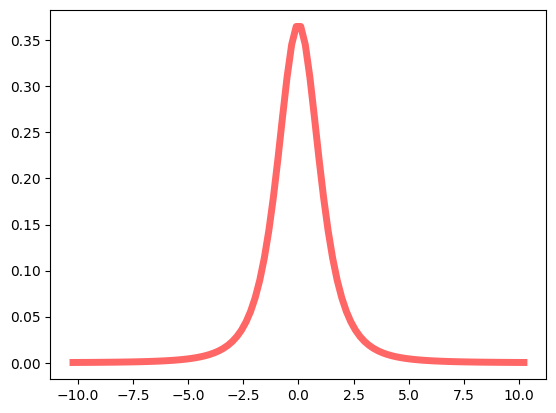

In [ ]:
import numpy as np

from scipy.stats import t
# análogo de from scipy.stats import norm

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# define a quantidade de graus de liberdade.
df = 3 # degrees of freedom

# plota a curva da distribuição t
x = np.linspace(t.ppf(0.001, df), t.ppf(0.999, df), 100)
ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.6, label='t pdf')

Para fins de comparação, a célula de código abaixo apresenta novamente a curva da distribuição $t$, dessa vez sobreposta com a curva da distribuição normal padrão. Experimente aumentar o valor da variável `df` para verificar o que acontece com a forma da curva da distribuição $t$. Em particular, você deve perceber que, para valores de `df` maiores do que 30, as duas curvas são praticamente indistinguíveis.

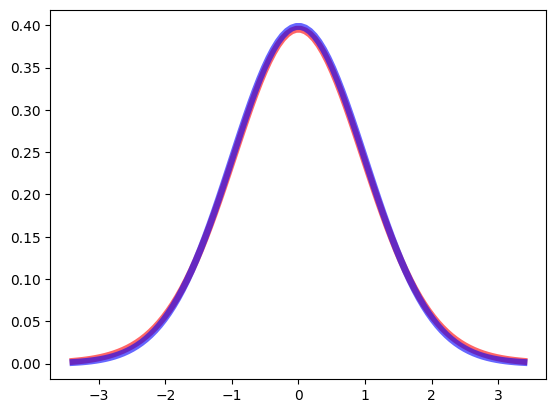

In [ ]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# define a quantidade de graus de liberdade.
df = 30
# plota a curva da distribuição t
x = np.linspace(t.ppf(0.001, df), t.ppf(0.999, df), 100)
ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.6, label='t pdf')

# plota a curva da distribuição normal padrão
ax.plot(x, norm.pdf(x), 'b-', lw=5, alpha=0.6, label='standard normal pdf')

### Funções do scipy relacionadas

Felizmente, não precisamos realizar cálculos diretamente com a expressão matemática da função de densidade de probabilidade da distribuição $t$. A maioria dos pacotes estatísticos fornecem funções para computar valores no contexto da distribuição $t$. Nesta seção, apresentamos algumas funções do pacote [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) relacionadas à distribuição $t$.

#### t.ppf

A função ppf (abreviação de *percent point function*) permite computar valores correspondentes à inversa da função de distribuição acumulada. A função t.ppf apresenta a seguinte assinatura:

> `t.ppf(q, df)`

Na expressão acima, o argumento `df` é uma abreviação para degrees of freedom e corresponde ao parâmetro $\nu$ da distribuição $t$. Esse mesmo argumento aparece nas demais funções definidas no pacote scipy.stats.t.

Por exemplo, o comando `t.ppf(.95, 30)` retorna um valor próximo de $1.69$, que é o valor do percentil 95 da distribuição $t$ com 30 graus de liberdade. Esse valor significa que 95\% da área abaixo da curva dessa distribuição está à esquerda do valor $1.69$, e que apenas 5\% está à direita.

In [ ]:
from scipy.stats import t
t.ppf(.95, 30)

1.6972608943617378

In [ ]:
from scipy.stats import t
t.ppf(.55, 30)

0.12672961287886134

In [ ]:
from scipy.stats import t
t.ppf(.5, 30)

6.693527296961538e-17

In [ ]:
from scipy.stats import t
t.ppf(0.05, 30)

-1.6972608943617384

#### t.cdf

Esta função retorna o valor da CDF, que é a probabilidade de ser gerado um número menor ou igual ao argumento x. A função cdf (abreviação de *cummulative distribution function*) apresenta a seguinte assinatura:

> `t.cdf(x, df)`

Por exemplo, a chamada `t.cdf(1.697, 30)` retorna um resultado próximo de 95\%. Já que $1.679$ corresponde ao $95^o$ percentil, o valor resultante da chamada é de aproximadamente 95\%.


In [ ]:
from scipy.stats import t
t.cdf(1.697, 30)

0.9499750753969193

#### t.pdf

A chamada à função `t.pdf` produz o valor da função de densidade de probabilidade em x. Esse valor produzido corresponde à altura da curva da distribuição no ponto x.

> `t.pdf(x, df)`

Por exemplo, considere que $\nu=30$. Para $x= 1.697$, o valor resultante é $0.096$, enquanto que para $x = 0$ é aproximadamente $0.396$.

In [ ]:
from scipy.stats import t
print(t.pdf(0, 30))
print(t.pdf(-2, 30))

0.39563218489409696
0.05685227504719787


In [ ]:
from scipy.stats import t
print(t.pdf(1.697, 30))
print(t.pdf(0, 30))

0.09555801703539088
0.39563218489409696


In [ ]:
from scipy.stats import t
print(t.pdf(0, 30))

0.39563218489409696


### Exemplos

Exemplo 1: Encontre os percentis 2.5 e 97.5 da distribuição Student $t$ com 5 graus de liberdade.

> Solução. Podemos usar a função ppf aqui, passando as porcentagens correspondentes aos percentis desejados.

In [ ]:
from scipy.stats import t
percentis = [.025, .975]
t.ppf(percentis, 5)

array([-2.57058184,  2.57058184])

Exemplo 2: Uma amostra aleatória de tamanho 10 é colhida a partir de uma população com distribuição normal com média $\mu=4$. Define-se a estatística T conforme a seguir:

$$
T = \frac{\overline{x} - 4}{s / \sqrt{10}}
$$

Qual é a probabilidade de que $T>1.833$?

> Solução. Por definição, essa estatística segue a distribuição $t$ de Student, com $\nu = 10-1 = 9$ graus de liberdade. Por meio da função `t.cdf`, podemos computar $\Pr(T > 1.833)$. Ao fazer isso, obtemos = $\Pr(T > 1.833) \approx 0.05$.

In [ ]:
from scipy.stats import t
print(1 - t.cdf(1.833, 9))

0.05000897002529148


Exemplo 3: Encontre o valor para a distribuição $t_{12}$ que delimita a sua direita uma área correspondente à probabilidade $0.025$.

> Solução. Basta usar a função `t.ppf`, passando como primeiro argumento o complemento de $0.025$, e como segundo argumento o valor 12 (quantidade de graus de liberdade). O valor procurado é então aproximadamente $2.179$.

In [ ]:
from scipy.stats import t
t.ppf(1 - .025, 12)

2.1788128296634177

Exemplo 4: Determine o valor da variável aleatória que segue a distribuição $t_{14}$ para o qual a área da cauda inferior é de 0.01.

> Solução. Esse exemplo é análogo ao anterior. O valor para a variável aleatória que segue a distribuição $t_{14}$ e que delimita uma área (ou a probabilidade) de 1\% na cauda inferior é de aproximadamente -2.624.

In [ ]:
from scipy.stats import t
t.ppf(.01, 14)

-2.6244940675602315

## Intervalo de confiança para $\mu$

Quando o tamanho da amostra é grande, não importa qual é a distribuição da população para a determinação de uma estimativa intervalar para a média populacional. Isso porque o TLC garante que $\overline{x}$ será aproximadamente normalmente distribuída.

Porém, quando a amostra disponível é pequena ($n \leq 30$), a distribuição da população deve ser aproximadamente normal para que se possa fazer estimativas adequadas. Nesse caso, intervalos de confiança são construídos de forma semelhante ao caso em que $n>30$. A diferença é que o z-score (denotado por $z_{\alpha/2}$) é substituído por um valor da distribuição $t$ de Student, o t-score. Esse valor, denotado por $t_{n-1, \alpha/2}$, é aquele que delimita uma área de $\alpha / 2$ na cauda do lado direito da distribuição $t$.

Para amostras pequenas, o procedimento geral para a determinação de um intervalo de confiança para $\mu$ é resumido a seguir.

### Procedimento de cálculo

Para construir um intervalo de confiança no nível de $(1-\alpha)$% para a média populacional $\mu$, considere que:
- $X_{1}, X_{2}, \ldots, X_{n}$ é a amostra aleatória de tamanho $n$ ($n \leq 30$);

- $(1-\alpha)$% é o nível de confiança definido para o estudo.

Procedimento:

> 1. Calcular a média da amostra:
$$
\overline{x} = \frac{\left(X_{1} + X_{2} + \cdots + X_{n}\right)}{n}
$$
2. Calcular o desvio padrão da amostra:
$$
s = \sqrt{{\frac {1}{n-1}}\sum _{i=1}^{n}{\big (}X_{i}-{\overline{x}}\,{\big )}^{2}}
$$
3. Determinar $t_{n-1, \alpha/2}$, o escore na distribuição $t$ de Student que delimita uma área de $\alpha/2$ no lado direito da curva da distribuição.
4. Computar os extremos do intervalo de confiança usando a expressão a seguir:
$$
\overline{x} \pm t_{n-1, \alpha/2} \times \frac{s}{\sqrt{n}}
$$

In [ ]:
from scipy.stats import t
from scipy.stats import norm

import numpy as np
amostra = np.array([56.3, 65.4, 58.7, 70.1, 63.9])
media_amostral = np.mean(amostra)

s = np.std(amostra, ddof = 1)

n = amostra.shape[0]

df = n - 1

alpha = 1 - 0.95

t_score = t.ppf(alpha/2, df)

erro_padrao = np.abs(t_score * s/np.sqrt(n))

print("IC(95): [%.2f, %.2f]" % (media_amostral-erro_padrao, media_amostral+erro_padrao))

IC(95): [56.07, 69.69]


### Exemplo 1

> Um técnico em metalurgia está estudando um novo processo de soldagem. Ele fabrica 5 juntas soldadas usando esse processo e mede a resistência à deformação de cada uma. Os cinco valores (medidos em [ksi](https://en.wikipedia.org/wiki/Pounds_per_square_inch)) são
\begin{equation}
	56.3 \ \; 65.4 \ \; 58.7 \ \; 70.1 \ \; 63.9 \end{equation}
Suponha que esses valores são uma amostra aleatória simples proveniente de uma população aproximadamente normal. Determine um intervalo de confiança no nível de 95\% para a resistência média das soldaduras forjadas nesse processo.

**Solução**

A figura a seguir mostra a distribuição $t_4$ (curva em vermelho). Essa figura também apresenta uma área hachurada (em cor azul) que corresponde a 95\% da área total sob a curva. Os limites dessa área hachurada são $x=-2.776$ e $x=2.776$.

Segue-se que, para 95\% de todas as amostras que poderiam ter sido escolhidas, vale a seguinte desigualdade:

$$
-2.776 < \frac{\overline{x} - \mu}{s/\sqrt{n}} < 2.776
$$

Ao manipular essa desigualdade, acabamos por obter o seguinte:

$$
\overline{x} - 2.776\frac{s}{\sqrt{n}} < \mu < \overline{x} + 2.776\frac{s}{\sqrt{n}}
$$

A média e o desvio padrão da amostra são, respectivamente, $\overline{x} = 62.88$ e $s = 5.4838$. O tamanho da amostra é $n = 5$. Ao fazermos a substituição de valores, descobrimos que um intervalo de confiança de 95\% para $\mu$ é

$$
62.88-6.81 < \mu < 62.88 + 6.81
$$

ou $(56.07, 69.69)$.


A célula de código a seguir produz a solução para o Exemplo 1 usando Python.


In [ ]:
import numpy as np
amostra = np.asarray([56.3, 65.4, 58.7, 70.1, 63.9])
from scipy.stats import t

media = amostra.mean()
print("Média: %.2f" % media)

s = amostra.std(ddof=1)
print("Desvio padrão: %.2f" % s)

n = 5

alpha = 0.05
t_score = t.ppf(alpha/2, n-1)
t_score = np.abs(t_score)
print("t-score: %.3f" % t_score)

erro_padrao = t_score * (s/np.sqrt(n))

print("IC 95%%: (%.2f, %.2f)" % (media-erro_padrao, media+erro_padrao))

Média: 62.88
Desvio padrão: 5.48
t-score: 2.776
IC 95%: (56.07, 69.69)


No código acima, atente para o uso de `ddof=1` na chamada da função `std` do numpy. Essa configuração faz com que a fórmula do desvio padrão amostral $s$ seja usada, e não a fórmula do desvio padrão populacional $\sigma$. Veja a diferença entre essas duas fórmulas a seguir:

$$
s = \sqrt{{\frac {1}{n-1}}\sum _{i=1}^{n}{\big (}X_{i}-{\overline{x}}\,{\big )}^{2}}
$$

$$
\sigma = \sqrt{{\frac {1}{n}}\sum _{i=1}^{n}{\big (}X_{i}-{\mu}\,{\big )}^{2}}
$$

Veja a entrada da Wikipedia sobre a [correção de Bessel](https://en.wikipedia.org/wiki/Bessel%27s_correction) para entender a razão disso.

A célula de código abaixo apresenta outra solução para o mesmo Exemplo 1, desta vez destacando os diversos passos do procedimento.

In [ ]:
import numpy as np
from scipy.stats import t

amostra = [56.3, 65.4, 58.7, 70.1, 63.9]
n = len(amostra)

# passo 1
x_bar = np.mean(amostra)

# passo 2
s = np.std(amostra, ddof=1)

# passo 3
conf_level = .95 # 1-alpha
alpha_over_2 = (1-conf_level)/2
df = n - 1
t_score = t.ppf(1-alpha_over_2, df)

# passo 4
erro_amostral = t_score * s / np.sqrt(n)

print('IC 95%%: (%.2f, %.2f)' % (x_bar-erro_amostral, x_bar+erro_amostral))

IC 95%: (56.07, 69.69)


Para um melhor entendimento do significado do valot de t-score, considere a célula de código abaixo. Esse código produz um gráfico da curva da distribuição $t$ com 4 graus de liberdade. Além disso, parte da área abaixo da curva da distribuição está hachurada em azul. Essa é a área delimitada entre $-2.776$ e $+2.776$, em que $2.776$ é o valor crítico (i.e., o valor absoluto do t-score). Repare que essa área corresponde a 95% da área total abaixo da curva, e que esse valor é justamente a porcentagem definida para o nível de confiança no Exemplo 1.

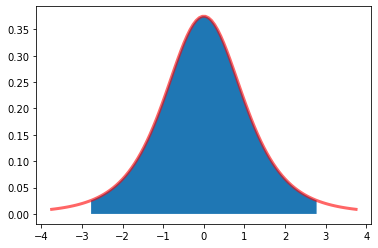

In [ ]:
%matplotlib inline

import matplotlib
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt

valor_critico = 2.776

fig, ax = plt.subplots(1, 1)

# define a quantidade de graus de liberdade.
# No caso do Exemplo 1, df = n - 1 = 5 - 4 = 4.
df = 4

# plota a curva da distribuição t
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df), 'r-', lw=3, alpha=0.6, label='t pdf')

x_to_fill = np.linspace(-valor_critico, valor_critico, 100)
plt.fill_between(x_to_fill,t.pdf(x_to_fill, df))

### Exemplo 2

> Uma amostra de 25 elementos tem média igual a 150 e desvio padrão igual a 10. Determine um intervalo de confiança em nível de 90\% para a média populacional.

**Solução**

Porque $n < 30$, iremos usar a distribuição $t$ de Student. Desejamos um intervalo de confiança no nível de 90\%. A média e o desvio padrão da amostra são fornecidos. Para determinar o t-score, encontramos o número de graus de liberdade, que é $\nu = (n-1)$. Logo, $\nu = (25-1)=24$.

O nível de confiança desejado é $(1 - \alpha) = 0.9$. Sendo assim, $\alpha = 0.1$ e $\alpha/2 = 0.05$.

Conhecendo o número de graus de liberdade e o nível de confiança, encontramos o valor do t-score. Neste caso, $t_{n-1, \alpha/2}=1.7109$.

Agora, podemos contruir o intervalos de confiança usando a expressão a seguir.
$$
\overline{x} \pm t_{n-1, \alpha/2} \times \frac{s}{\sqrt{n}}
$$

Ao fazermos isso, encontramos o seguinte intervalo de confiança: (146.58, 153.42).


In [ ]:
import numpy as np

media = 150
print("Média: %.2f" % media)

s = 10
print("Desvio padrão: %.2f" % s)

n = 25

alpha = .1
t_score = t.ppf(alpha/2, n-1)
t_score = np.abs(t_score)
print("t-score: %.4f" % t_score)

erro_padrao = t_score * (s/np.sqrt(n))

print("IC 90%%: (%.2f, %.2f)" % (media-erro_padrao, media+erro_padrao))

Média: 150.00
Desvio padrão: 10.00
t-score: 1.7109
IC 90%: (146.58, 153.42)


In [ ]:
from itertools import combinations, product

In [ ]:
#temp = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
temp = [1, 2, 3]
list(product(temp, repeat=2))

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]